<a href="https://colab.research.google.com/github/samans98/practice/blob/main/Animal_clf_Tflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("tensorflow version:", tf.__version__)

tensorflow version: 2.15.0


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100 as cf100
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cf100.load_data()

In [37]:
(train_images, train_labels), (test_images, test_labels) = cf100.load_data()

<ipython-input-56-0a6f6fb9b46c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


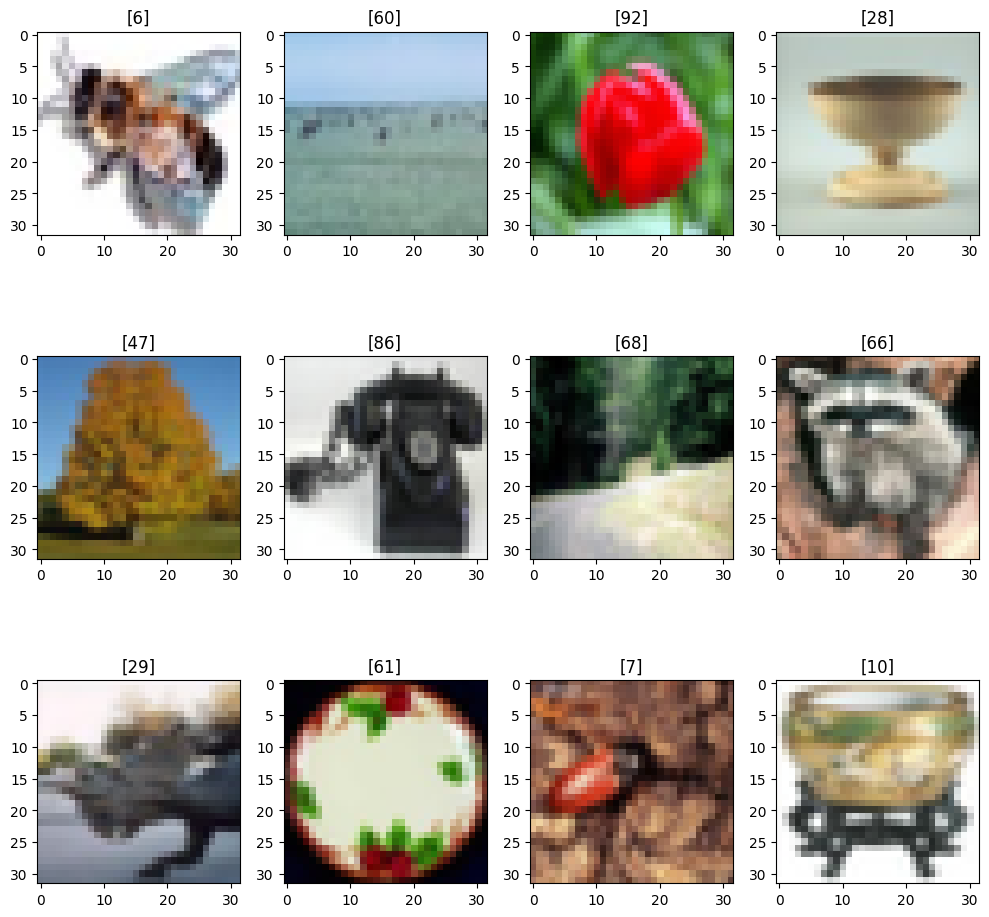

In [56]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


show_samples(train_images, train_labels)

In [59]:
"""CF10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)"""

"CF10\nclass_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',\n           \t'dog', 'frog', 'horse', 'ship', 'truck']\n\nshow_images(train_images, class_names, train_labels)"

In [60]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [61]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS =  18

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/18
1563/1563 [==============================] - 9s 5ms/step - loss: 3.7007 - accuracy: 0.1403 - precision: 0.6503 - recall: 0.0167 - val_loss: 3.2136 - val_accuracy: 0.2318 - val_precision: 0.6591 - val_recall: 0.0522
Epoch 2/18
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9617 - accuracy: 0.2700 - precision: 0.6971 - recall: 0.0772 - val_loss: 2.8509 - val_accuracy: 0.2917 - val_precision: 0.7252 - val_recall: 0.0974
Epoch 3/18
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6354 - accuracy: 0.3363 - precision: 0.7258 - recall: 0.1309 - val_loss: 2.6371 - val_accuracy: 0.3352 - val_precision: 0.7563 - val_recall: 0.1372
Epoch 4/18
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4376 - accuracy: 0.3766 - precision: 0.7421 - recall: 0.1736 - val_loss: 2.5720 - val_accuracy: 0.3490 - val_precision: 0.7071 - val_recall: 0.1772
Epoch 5/18
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2924 - accuracy: 0

In [ ]:
#CF100
show_performance_curve(training_history, 'accuracy', 'accuracy')

In [ ]:
#CF100


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]

    # Debug prints to check the contents of the performance lists
    print("Training performance:", train_perf)
    print("Validation performance:", validation_perf)

    # Ensure the lists are not empty
    if not train_perf or not validation_perf:
        print("Error: Performance lists are empty.")
        return

    # Try to find the intersection index
    intersection_indices = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()

    if intersection_indices.size == 0:
        print("No intersection found within the specified tolerance.")
        intersection_idx = None
        intersection_value = None
    else:
        intersection_idx = intersection_indices[0]
        intersection_value = train_perf[intersection_idx]

    # Plot the performance curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_perf, label=f'Training {metric_label}')
    plt.plot(validation_perf, label=f'Validation {metric_label}')
    plt.xlabel('Epochs')
    plt.ylabel(metric_label.capitalize())
    plt.title(f'Training and Validation {metric_label.capitalize()}')
    plt.legend()

    # Plot the intersection point if it exists
    if intersection_idx is not None:
        plt.axvline(x=intersection_idx, linestyle='--', color='r', label=f'Intersection at epoch {intersection_idx}')
        plt.scatter(intersection_idx, intersection_value, color='r')
        plt.legend()

    plt.grid(True)
    plt.show()

# Example usage (replace with your actual training history object)
# show_performance_curve(training_history, 'accuracy', 'Accuracy')


Training performance: [0.5002599954605103, 0.6335999965667725, 0.6838399767875671, 0.7204200029373169, 0.7467399835586548, 0.77538001537323, 0.7991600036621094, 0.8226199746131897, 0.8445799946784973, 0.862779974937439, 0.8825600147247314, 0.898419976234436]
Validation performance: [0.5889000296592712, 0.6496000289916992, 0.6686000227928162, 0.6940000057220459, 0.6953999996185303, 0.6897000074386597, 0.6977999806404114, 0.6816999912261963, 0.6952999830245972, 0.6873999834060669, 0.6955999732017517, 0.6894999742507935]
No intersection found within the specified tolerance.


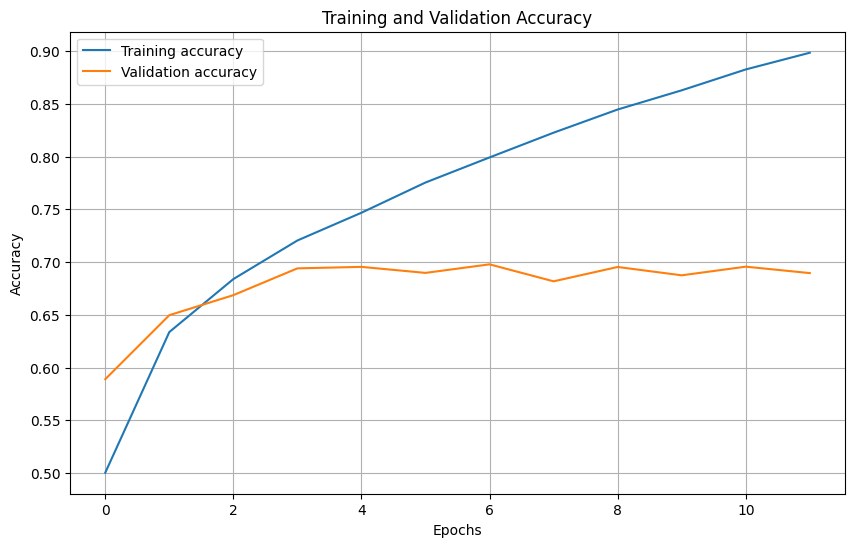

In [33]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

Training performance: [0.7137143015861511, 0.768629789352417, 0.7930986881256104, 0.813372790813446, 0.8278037309646606, 0.8455681204795837, 0.8592981100082397, 0.8727874159812927, 0.8862044215202332, 0.8964395523071289, 0.9084190726280212, 0.9203760027885437]
Validation performance: [0.7447676658630371, 0.7685009241104126, 0.7647454142570496, 0.7782150506973267, 0.7741060256958008, 0.7583925127983093, 0.7541647553443909, 0.7347720265388489, 0.7386427521705627, 0.733355700969696, 0.7259219288825989, 0.717553973197937]


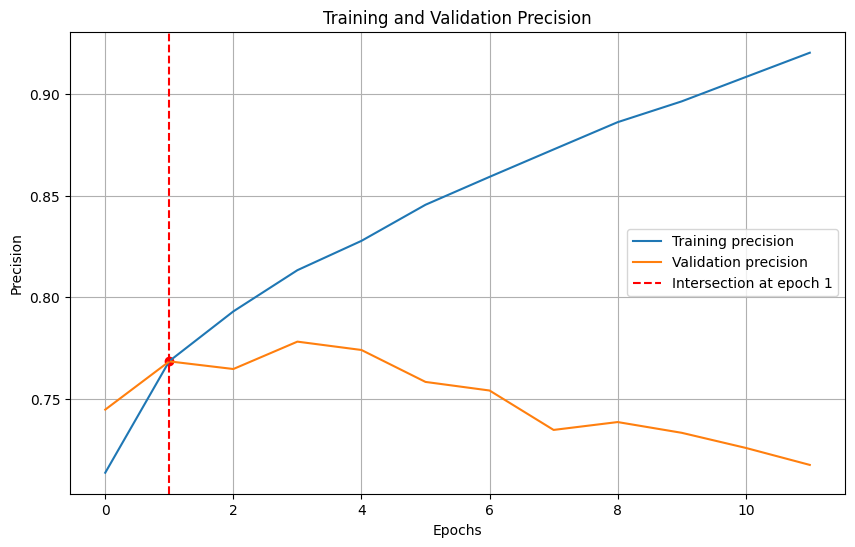

In [32]:
show_performance_curve(training_history, 'precision', 'precision')

313/313 [==============================] - 1s 2ms/step


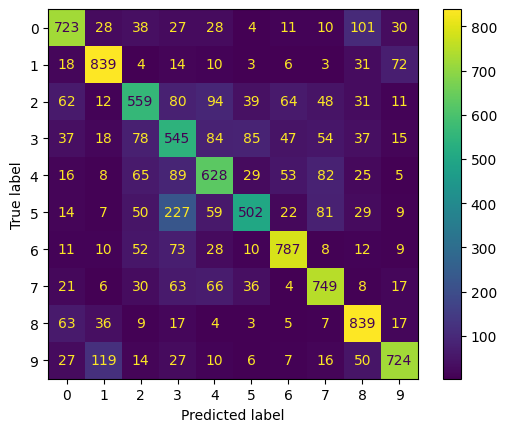

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()